# RMS Titanic
The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast.

In [14]:
import pandas as pd
df_titanic=pd.read_csv('read.csv')
df_titanic

,Passenger Id,Survived,P Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


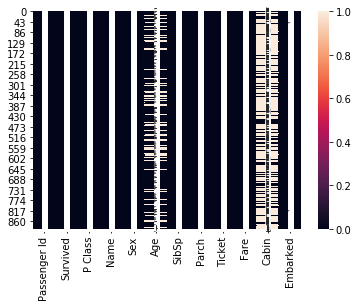

In [15]:
# for getting accurate result of any dataset need to check wheter any null value present in dataset or not.
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_titanic.isnull(),annot=True)
plt.show()

In [16]:
#Checking the null values without using visualisation.
df_titanic.isnull().sum()

Passenger Id      0
Survived          0
P Class           0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
dtype: int64

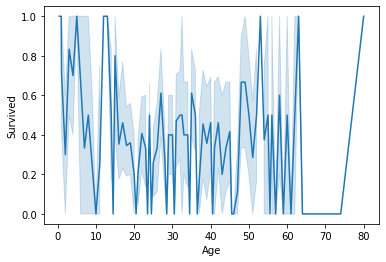

In [17]:
#let's see that how survival rate change with age group wither it's men and women.
sns.lineplot(x=df_titanic["Age"],y=df_titanic["Survived"],data=df_titanic)
plt.show()
#In below data it's showing that high probability of survival when they are between 18 and 30 years old. 

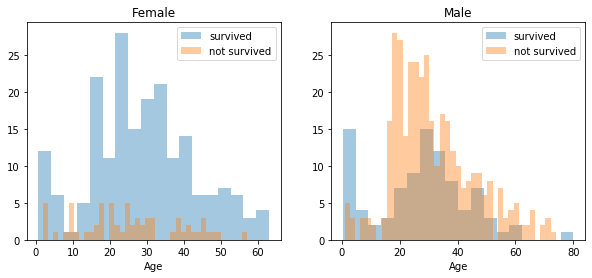

In [19]:
#let's see survival probility of men's and women. 
#You can see that men have a high probability of survival. When they are between 18 and 30 years old, 
#which is also a little bit true for women but not fully. 
#For women the survival chances are higher between 14 and 40.

from matplotlib import pyplot as plt

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df_titanic[df_titanic['Sex']=='female']
men = df_titanic[df_titanic['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

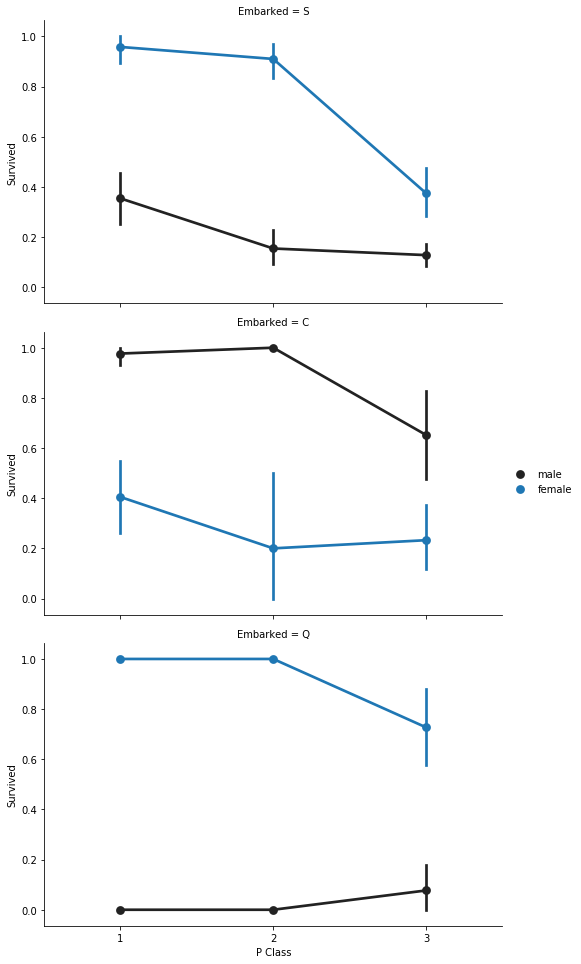

In [22]:
#let's see the correlation between Pclass and survival.  
FacetGrid = sns.FacetGrid(df_titanic, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'P Class', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

#Women on Embarked Q and on port S with respective to PClass have a higher chance of survival 
#but for Embarked C vice-versa. 
#Men on Embarked Q and on port S with respective to PClass have a low chance of survival. 
#but for Embarked C vice-versa. 

In [23]:
#let's check the skewness of the dataset 
df_titanic.skew()
#skewness is 0, the data are perfectly symmetrical, although it is quite unlikely for real-world data. 
#As a general rule of thumb: If skewness is less than -1 or greater than 1, the distribution is highly skewed.

Passenger Id    0.000000
Survived        0.478523
P Class        -0.630548
Age             0.389108
SibSp           3.695352
Parch           2.749117
Fare            4.787317
dtype: float64

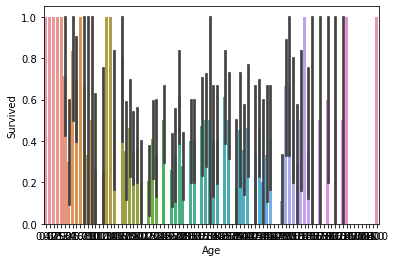

In [24]:
#let's check the average age group according to survivel survival.
sns.barplot(x=df_titanic["Age"],y=df_titanic["Survived"],data=df_titanic)
plt.show()

In [25]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Passenger Id  891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   P Class       891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           714 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
